In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Attrition.csv', encoding= 'unicode_escape')
df_back = df

In [4]:
cars=pd.read_csv("cars.csv")
cars.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [22]:
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


### Answer 1:

Create a function named ‘Histogram’ which will take the entire dataset as input and
return the histograms for all the numerical variables in your dataset as .png files in your working
directory. Make sure that all the generated graphs have proper titles and axis labels. 

Histogram(data) -> *returns histograms for all numerical variables in data.*

In [ ]:
def Histogram(data):
    try:
        if not isinstance(data, pd.DataFrame):# Making sure that data variable is a DataFrame
           raise TypeError('The data must be passed in a dataframe')
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numeric_vars = data.select_dtypes(include=numerics).columns.tolist()
    
        for col in numeric_vars:
            plt.figure()
            plt.clf()
            data[col].hist(bins=30, figsize=(10,5))
            plt.xlabel(col, fontsize=14)
            plt.ylabel('Frequency', fontsize=14)
            plt.title('Histogram of '+col, fontsize=20)
            plt.savefig('Histogram_'+col+'.png')

        print("Histograms downloaded at : ", os.getcwd())
    
    except TypeError as err:
        print("ERROR: Check the function argument datatype")
        print(err.args[0])
    except:
        print("ERROR: An error has occurred")

In [ ]:
Histogram(df)

### Answer 2:

Make an improvement on the function you have created in 1. Create a function names ‘Graphs’
which will take a dataset as input and return histograms and boxplots for all the numerical
variables and bar plots for all categorical variables. 

Graphs(data)
-> *returns histograms and boxplots for all numerical variables and bar plot for all categorical variables in data.*

In [ ]:
def Graphs(data):
    try:
        if not isinstance(data, pd.DataFrame):# Making sure that data variable is a DataFrame
           raise TypeError('The data must be passed in a dataframe')
        
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numeric_vars = data.select_dtypes(include=numerics).columns.tolist()
        cateogorical_vars = data.select_dtypes(include=['object','bool']).columns.tolist()
        
        for col in numeric_vars:
            plt.figure()
            plt.clf()
            data[col].hist(bins=30, figsize=(10,5))
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Frequency', fontsize=10)
            plt.title('Histogram of '+col, fontsize=12)
            plt.savefig("Histogram_"+col+".png")
        print("Histograms downloaded at : ", os.getcwd())

        for col in numeric_vars:
            plt.figure
            plt.clf()
            sns.boxplot(data[col])
            plt.xlabel('Range of Values', fontsize=10)
            plt.title('Boxplot of '+col, fontsize=12)
            plt.savefig("Boxplot_"+col+".png")
        print("Box Plots downloaded at : ", os.getcwd())

        for col in cateogorical_vars:
            plt.figure()
            plt.clf()
            sns.countplot(data[col]).set_title('Bar Plot of '+col)
            plt.savefig("Barplot_"+col+".png")
        print("Bar Plots downloaded at : ", os.getcwd())
    
    except TypeError as err:
        print("ERROR: Check the function argument datatype")
        print(err.args[0])
    except:
        print("ERROR: An error has occurred")


In [ ]:
Graphs(df)

### Answer 3:

Often, we are not required to plot the graphs for all the variables in our dataset. Add an additional
argument to the function in 2 named ‘var’. This will take a list containing the variable index and
return the graphs for only those variables. By default, (i.e. if the list of variable index is not
provided), then it must return the required graphs for all the variables in data. 

Graphs(data, var=c(1,3,4))
-> *Will generate the graphics for only the variables 1,3 & 4 in the
data.*

In [ ]:
def Graphs(data, var=[]):
    try:
        data=data.copy()
        if not isinstance(var,list):# Making sure that var variable is a list
           raise TypeError('The column numbers must be present in a list')
        if len(var)!=0:
            drop_cols = list(range(len(data.columns)))
            drop_cols = list(set(drop_cols).difference(var))
            data.drop(data.columns[drop_cols], axis=1, inplace=True)
            
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numeric_vars = data.select_dtypes(include=numerics).columns.tolist()
        cateogorical_vars = data.select_dtypes(include=['object','bool']).columns.tolist()
   
        for col in numeric_vars:
            plt.figure()
            plt.clf()
            data[col].hist(bins=30, figsize=(10,5))
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Frequency', fontsize=10)
            plt.title('Histogram of '+col, fontsize=12)
            plt.savefig("Histogram_"+col+".png")
        print("Histograms downloaded at : ", os.getcwd())

        for col in numeric_vars:
            plt.figure()
            plt.clf()
            sns.boxplot(data[col])
            plt.xlabel('Range of Values', fontsize=10)
            plt.title('Boxplot of '+col, fontsize=12)
            plt.savefig("Boxplot_"+col+".png")
        print("Box Plots downloaded at : ", os.getcwd())

        for col in cateogorical_vars:
            plt.figure()
            plt.clf()
            sns.countplot(data[col]).set_title('Bar Plot of '+col)
            plt.savefig("Barplot_"+col+".png")
        print("Bar Plots downloaded at : ", os.getcwd())
        
    except TypeError as err:
        print("ERROR: Check the function argument datatype")
        print(err.args[0])
    except:
        print("ERROR: An error has occurred")

In [ ]:
Graphs(df,{1:"test",2:"test2",3:"test3"})

### Answer 4:

Sometimes, we do not want to mess up our working directories with so many image files. Create
an additional argument for the function "dir" (directory), such that the function exports all the
files to that specified folder (which need not necessarily be your working directory). 

Graphs(data, Variable=c(1,3,4), dir=".../Praxis/Graphs")
-> *will generate all the necessary graphics for the variables 1, 3
and 4 in the specified location in your system which is ".../Praxis/
Graphs"*

In [19]:
def Graphs(data, var=[],dir=os.getcwd()):    #Default value for dir is current working directory
    try:
        data=data.copy()
        if not isinstance(var,list):# Making sure that var variable is a list
           raise TypeError('The column numbers must be present in a list')
        if not isinstance(data, pd.DataFrame):# Making sure that data variable is a DataFrame
           raise TypeError('The data must be passed in a dataframe')
        
        curdir=os.getcwd()                   #Saving current working directory in a string
        print(curdir)
        if os.path.isdir(dir):
            os.chdir(dir)                  #Changing directory to the one given in arguement
        else:
            raise SyntaxError("Enter a valid directory")
            
        if len(var)!=0:                                    #Selecting subset of data with col no given in var list
            drop_cols = list(range(len(data.columns)))
            drop_cols = list(set(drop_cols).difference(var))
            print(drop_cols)
            data.drop(data.columns[drop_cols], axis=1, inplace=True)
            
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
        numeric_vars = data.select_dtypes(include=numerics).columns.tolist() #Column names of numerical datatypes
        cateogorical_vars = data.select_dtypes(include=['object','bool']).columns.tolist() #Column names of categorical datatypes
        
        for col in numeric_vars:                            #Histogram Plotting
            plt.figure()
            plt.clf()
            data[col].hist(bins=30, figsize=(10,5))
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Frequency', fontsize=10)
            plt.title('Histogram of '+col, fontsize=12)
            plt.savefig("Histogram_"+col+".png")
        print("Histograms downloaded at : ", os.getcwd())

        for col in numeric_vars:                           #Boxplot Plotting
            plt.figure()
            plt.clf()
            sns.boxplot(data[col])
            plt.xlabel('Range of Values', fontsize=10)
            plt.title('Boxplot of '+col, fontsize=12)
            plt.savefig("Boxplot_"+col+".png")
        print("Box Plots downloaded at : ", os.getcwd())

        for col in cateogorical_vars:                      #Barplot Plotting
            plt.figure()
            plt.clf()
            sns.countplot(data[col]).set_title('Bar Plot of '+col)
            plt.savefig("Barplot_"+col+".png")
        print("Bar Plots downloaded at : ", os.getcwd())
        
        os.chdir(curdir) #Changing directory back to current working directory
    except TypeError as err:
        print("ERROR: Check the function argument datatype")
        print(err.args[0])
    except SyntaxError as err2:
        print("ERROR: Check the Path of the directory")
        print(err2.args[0])
    #except:
     #   print("ERROR: An error has occurred")

C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA
[4, 5, 6, 7, 8]
Histograms downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA\New folder\Graphs


D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Box Plots downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA\New folder\Graphs


D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Bar Plots downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA\New folder\Graphs


'C:\\Users\\Thinkpad-E470\\Downloads\\titanic\\Python EDA'

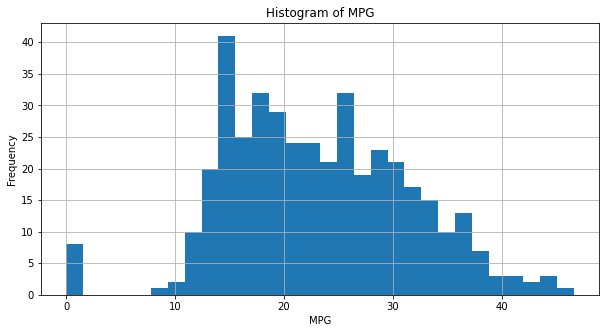

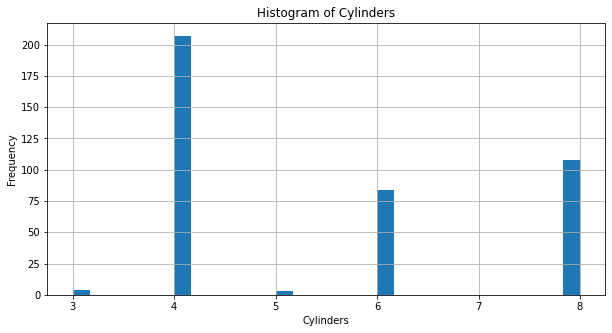

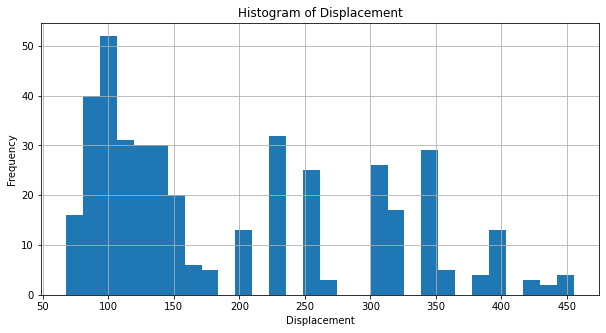

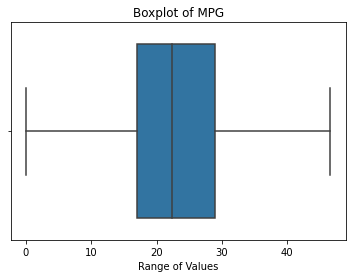

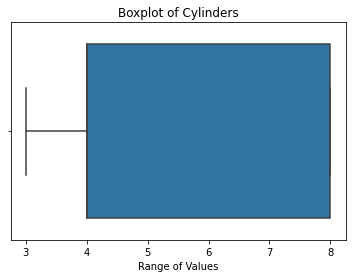

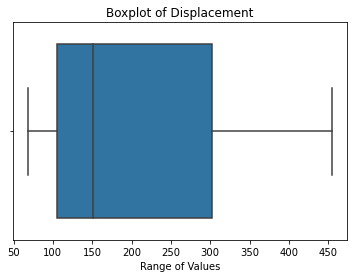

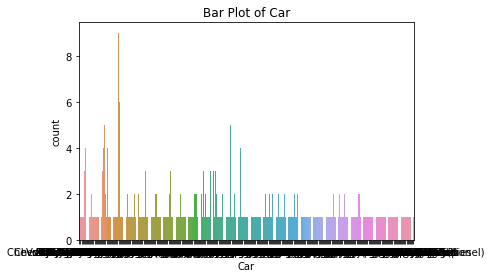

In [21]:
Graphs(cars,var=[0,1,2,3],dir="C:/Users/Thinkpad-E470/Downloads/titanic/Python EDA/New folder/Graphs")
os.getcwd()

---

### Answer 5:

Further Improvements: Create at least 2 more features of this function which you think can
benefit you in your EDA process.

Feature 1:In cars dataset,no of cylinder is actually discrete(categorical).But since its stored as number,its treated as continous and we plot histogram and boxplots for it.We use a number threshold to solve this issue.

Feature 2:In cars dataset,the variable car is actually a string representing name of the car.It should not be treated as categorical variable.We use a string threshold to solve this issue.

In [25]:
def Graphs(data, var=[],dir=os.getcwd(),num_thres=10,str_thres=20):    #Default value for dir is current working directory
    try:
        data=data.copy()
        if not isinstance(var,list):# Making sure that var variable is a list
           raise TypeError('The column numbers must be present in a list')
        if not isinstance(data, pd.DataFrame):# Making sure that data variable is a DataFrame
           raise TypeError('The data must be passed in a dataframe')
        
        curdir=os.getcwd()                   #Saving current working directory in a string
        print(curdir)
        if os.path.isdir(dir):
            os.chdir(dir)                  #Changing directory to the one given in arguement
        else:
            raise SyntaxError("Enter a valid directory")
            
        if len(var)!=0:                                    #Selecting subset of data with col no given in var list
            drop_cols = list(range(len(data.columns)))
            drop_cols = list(set(drop_cols).difference(var))
            print(drop_cols)
            data.drop(data.columns[drop_cols], axis=1, inplace=True)
            
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
        numeric_vars = data.select_dtypes(include=numerics).columns.tolist() #Column names of numerical datatypes
        cateogorical_vars = data.select_dtypes(include=['object','bool']).columns.tolist() #Column names of categorical datatypes
        
        for col in numeric_vars:                            #Histogram Plotting for variables above numerical threshold
            uniq=len(data[col].unique())
            if(uniq>num_thres):
                plt.figure()
                plt.clf()
                data[col].hist(bins=30, figsize=(10,5))
                plt.xlabel(col, fontsize=10)
                plt.ylabel('Frequency', fontsize=10)
                plt.title('Histogram of '+col, fontsize=12)
                plt.savefig("Histogram_"+col+".png")
        print("Histograms downloaded at : ", os.getcwd())

        for col in numeric_vars:                           #Boxplot Plotting for variables above numerical threshold
            uniq=len(data[col].unique())
            if(uniq>num_thres):
                plt.figure()
                plt.clf()
                sns.boxplot(data[col])
                plt.xlabel('Range of Values', fontsize=10)
                plt.title('Boxplot of '+col, fontsize=12)
                plt.savefig("Boxplot_"+col+".png")
        print("Box Plots downloaded at : ", os.getcwd())

        for col in cateogorical_vars:                      #Barplot Plotting for object variables below string threshold
            uniq=len(data[col].unique())
            if(uniq<=str_thres):
                plt.figure()
                plt.clf()
                sns.countplot(data[col]).set_title('Bar Plot of '+col)
                plt.savefig("Barplot_"+col+".png")
        print("Bar Plots downloaded at : ", os.getcwd())
        
        for col in numeric_vars:                      #Barplot Plotting for numeric variables below numerical threshold
            uniq=len(data[col].unique())
            if(uniq<=num_thres):
                plt.figure()
                plt.clf()
                sns.countplot(data[col]).set_title('Bar Plot of '+col)
                plt.savefig("Barplot_"+col+".png")
        print("Bar Plots downloaded at : ", os.getcwd())
        
        os.chdir(curdir) #Changing directory back to current working directory
    except TypeError as err:
        print("ERROR: Check the function argument datatype")
        print(err.args[0])
    except SyntaxError as err2:
        print("ERROR: Check the Path of the directory")
        print(err2.args[0])
    

C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA
[4, 5, 6, 7, 8]
Histograms downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA


D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Box Plots downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA
Bar Plots downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA


D:\Analytics\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Bar Plots downloaded at :  C:\Users\Thinkpad-E470\Downloads\titanic\Python EDA


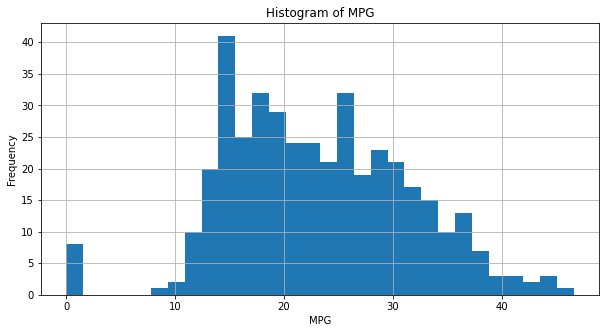

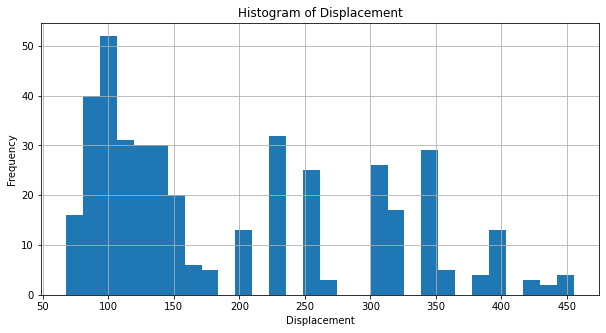

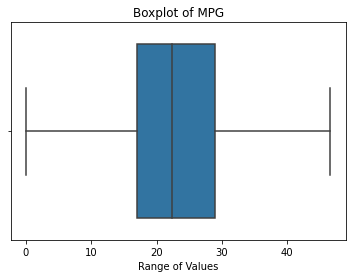

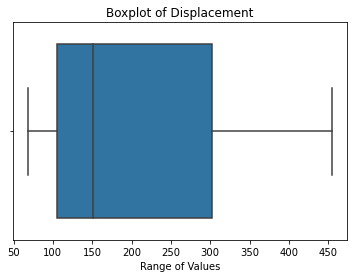

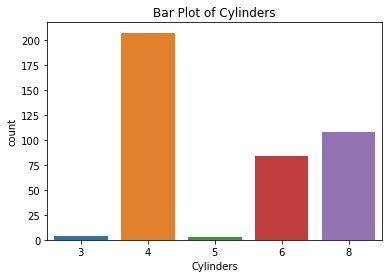

In [26]:
Graphs(cars,[0,1,2,3])